# Problem statement
Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


# Import Laibraries

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
#load dataset
air=pd.read_excel(r"C:\Users\t5498nk\Desktop\NAVANEETH KADALOORI\DATA SCIENCE\Forecasting\Airlines+Data.xlsx")

# Data preprocessing

In [5]:
air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [6]:
air.shape

(96, 2)

In [7]:
air.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [8]:
air.isna().sum()

Month         0
Passengers    0
dtype: int64

In [9]:
air.set_index('Month', inplace=True)
air.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


<Axes: >

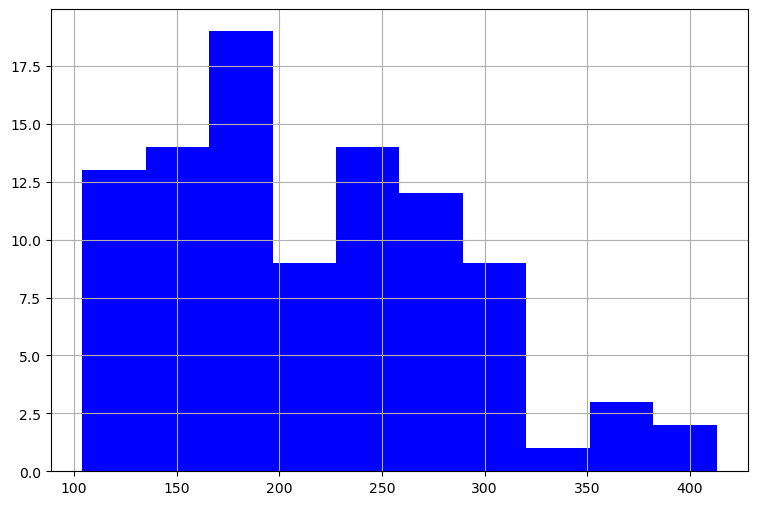

In [10]:
#Histogram plot
ax=plt.axes()
air['Passengers'].hist(figsize=(9,6),color='Blue')

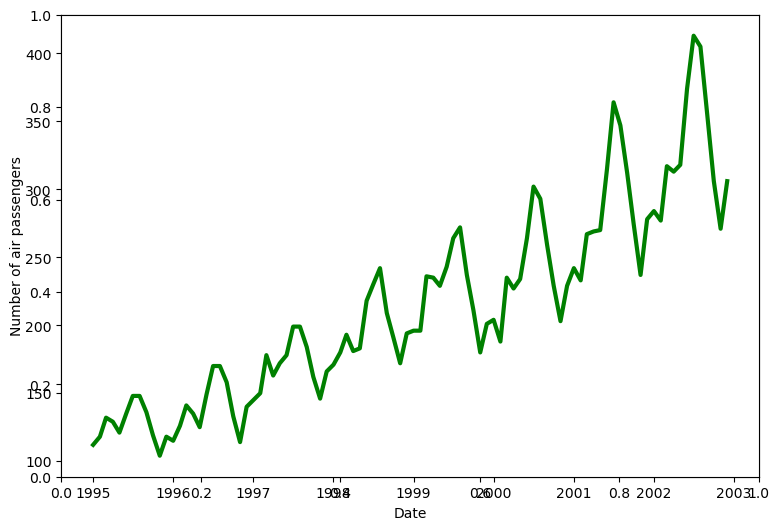

In [11]:
#Lineplot
plt.figure(figsize=(9,6))
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
ax=plt.axes()
plt.plot(air['Passengers'],color='Green',linewidth=3)

<Axes: ylabel='Density'>

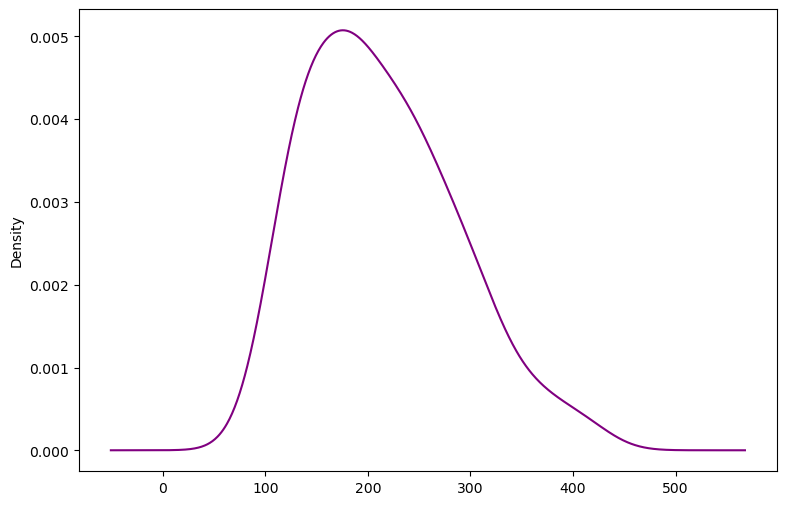

In [12]:
#Density PLot
ax=plt.axes()
air['Passengers'].plot(kind='kde',figsize=(9,6),color='Purple')

In [13]:
#Lagplot
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

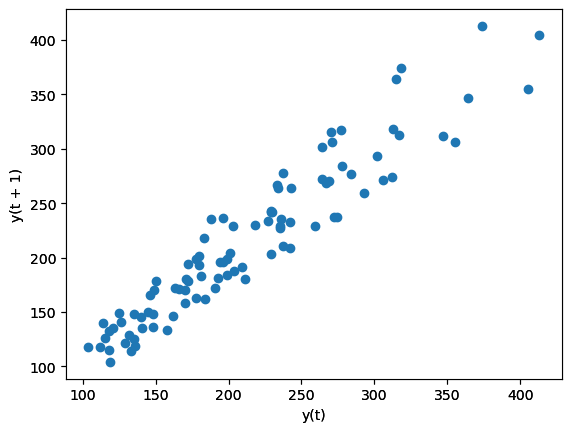

In [14]:
lag_plot(air['Passengers'])
ax=plt.axes()
pd.plotting.lag_plot(air, lag=1)

In [15]:
#tsaplot
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.api as sm

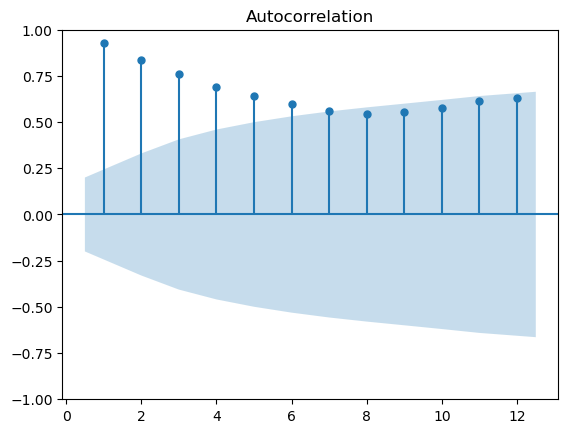

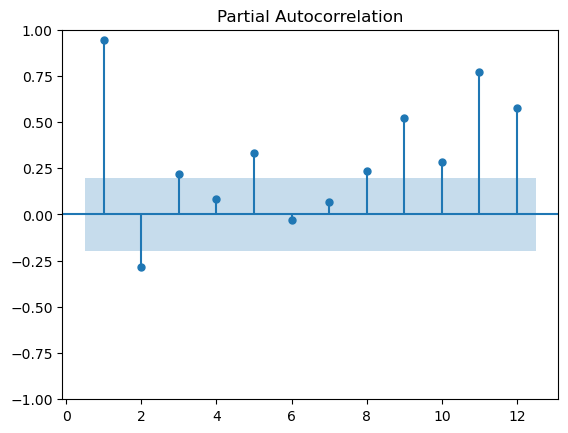

In [16]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(air, lags=12, zero=False)
sgt.plot_pacf(air, lags=12, zero=False, method=('ols'))
plt.show()

# Forecasting Methods

In [17]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing #SES
from statsmodels.tsa.holtwinters import Holt#Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Splitting data into train and test

In [18]:
Train=air.head(84)
Test=air.tail(12)

# Moving Average Method

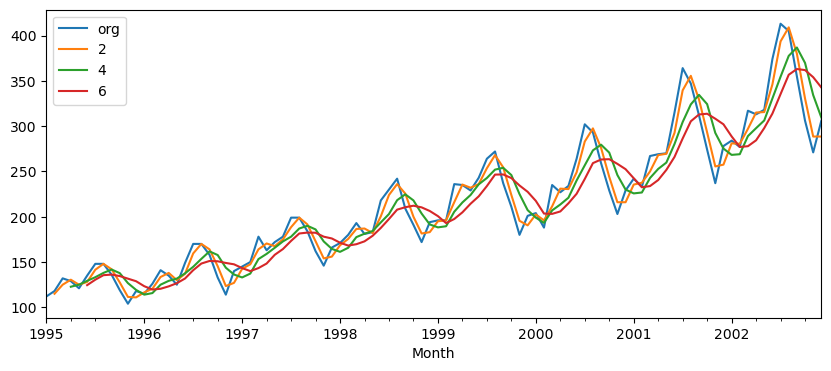

In [19]:
plt.figure(figsize=(10,4))
air.Passengers.plot(label="org")
for i in range(2,8,2):
     air["Passengers"].rolling (i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot

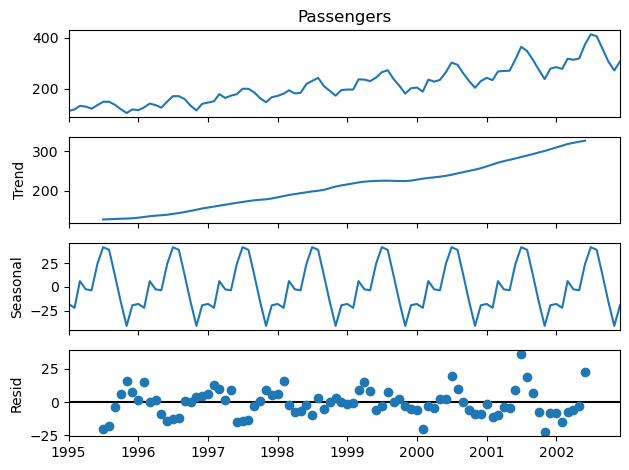

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add=seasonal_decompose(air.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

# Evaluation Metric RMSE 

In [21]:
def RMSE(org,pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

# Simple Exponential Smoothing Method

In [22]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Passengers, pred_ses)
rmse_ses_model

C:\Users\t5498nk\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


68.0067403134932

# Holt method

In [23]:
hw_model=Holt(Train["Passengers"]).fit()
pred_hw=hw_model.predict(start=Test.index[0],end=Test.index[-1])
rmse_hw_model=RMSE(Test.Passengers,pred_hw)
rmse_hw_model

C:\Users\t5498nk\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


52.92196508333604

# Holts winter exponential smoothing

In [24]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_as_at=ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_as_at=hwe_model_as_at.predict(start=Test.index[0],end=Test.index[-1])
rmse_hwe_as_at_model=RMSE(Test.Passengers,pred_hwe_as_at)
rmse_hwe_as_at_model

C:\Users\t5498nk\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


62.71208217570936

In [25]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_st = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_st = hwe_model_mul_st.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_st_model = RMSE(Test.Passengers, pred_hwe_mul_st)
rmse_hwe_model_mul_st_model

C:\Users\t5498nk\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


64.66373828300254

# Model based Forecasting Methods

In [26]:
# Data preprocessing for models
air1 = air.copy()
air1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [27]:
air1["t"] = np.arange(1,97)
air1["t_squared"] = air1["t"]*air1["t"]

air1["log_psngr"] = np.log(air1["Passengers"])

air1.head()

,Passengers,t,t_squared,log_psngr
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791


# Splitting data

In [28]:
#Splitting data into Train and Test
Train = air1.head(84)
Test = air1.tail(12)

# Linear Model

In [29]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Passengers'], pred_linear)
rmse_linear_model

53.199236534802715

# Exponential Model

In [30]:
Exp = smf.ols('log_psngr~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Passengers'], np.exp(pred_Exp))
rmse_Exp_model

46.0573611031562

# Quadratic Model

In [31]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Passengers'], pred_Quad)
rmse_Quad_model

48.051888979330975

# Auto-Regressive Integrated Moving Average (ARIMA model)

In [32]:
series = air.copy()
series

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [33]:
# separate out a validation dataset
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 84, Validation 12


# Persistence/ Base model

In [34]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True,)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.715)
train, test = X[0:train_size], X[train_size:]

print(train.shape)
print(test.shape)

(60, 1)
(24, 1)


In [35]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>Predicted=229.000, Expected=203.000
>Predicted=203.000, Expected=229.000
>Predicted=229.000, Expected=242.000
>Predicted=242.000, Expected=233.000
>Predicted=233.000, Expected=267.000
>Predicted=267.000, Expected=269.000
>Predicted=269.000, Expected=270.000
>Predicted=270.000, Expected=315.000
>Predicted=315.000, Expected=364.000
>Predicted=364.000, Expected=347.000
>Predicted=347.000, Expected=312.000
>Predicted=312.000, Expected=274.000
>Predicted=274.000, Expected=237.000
>Predicted=237.000, Expected=278.000
RMSE: 29.058


In [36]:
rmse_Persistence_model = 29.058

# ARIMA Hyperparameters

In [37]:
series = pd.read_excel(r'C:\Users\t5498nk\Desktop\NAVANEETH KADALOORI\DATA SCIENCE\Forecasting\Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)
series

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [38]:
# separate out a validation dataset
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 84, Validation 12


In [81]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

    # load dataset

train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


# Build Model based on the optimized values

In [54]:
# load data
train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=12)[0]
model_fit.plot_predict(1, 96)

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
